In [1]:
# Some packages we'll need
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
from pandas import read_csv
import pandas as pd
import numpy as np
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.dates as mdates
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


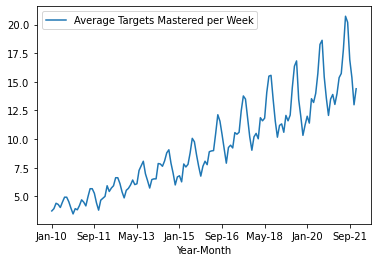

In [2]:
series = pd.read_csv('mastered data.csv', header=0, index_col=0)
series.plot()
pyplot.show()

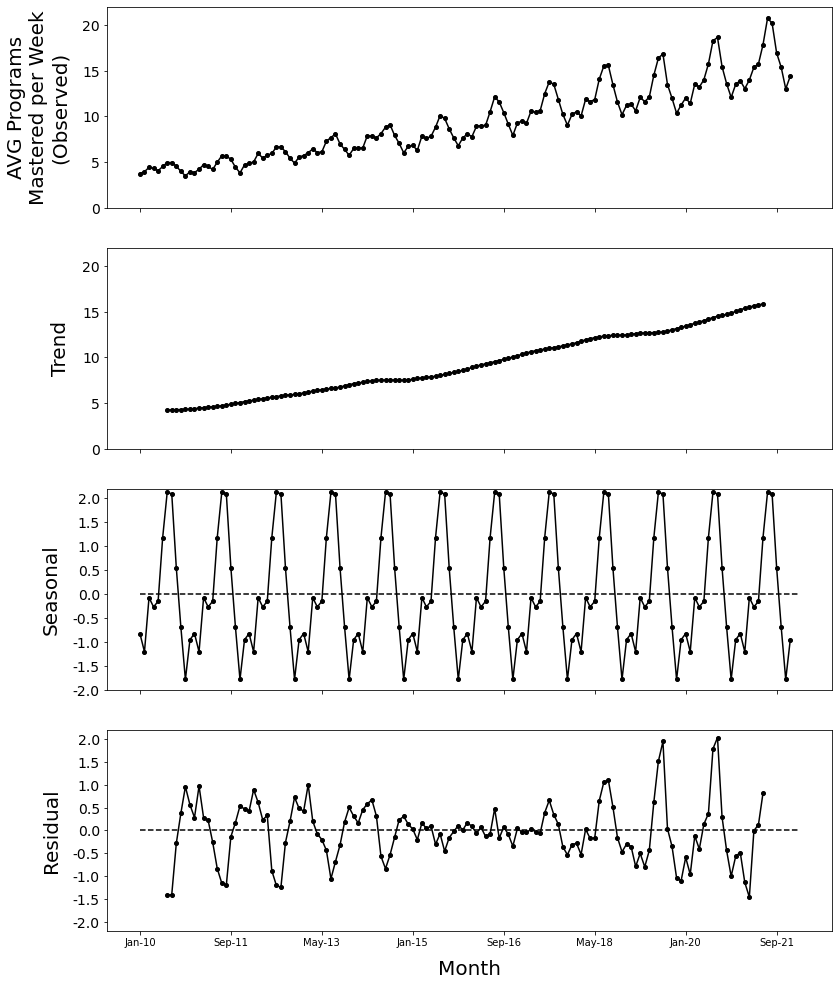

In [3]:
# Decompose it using statsmodels
result = seasonal_decompose(
    series, 
    model='additive', 
    two_sided=True, 
    period=12, 
    extrapolate_trend=False
)

# Plot it
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(13, 17))
result.observed.plot(ax=axes[0], legend=False, color='k', marker='o', markersize=4)
axes[0].set_ylabel("AVG Programs\nMastered per Week\n(Observed)", fontsize=20, labelpad=12)
axes[0].set_yticks(list(range(0, 25, 5)))
axes[0].set_yticklabels(list(range(0, 25, 5)), fontsize=14)
axes[0].set_ylim(0, 22)

result.trend.plot(ax=axes[1], legend=False, color='k', marker='o', markersize=4)
axes[1].set_ylabel("Trend", fontsize=20, labelpad=12)
ticks = list(np.arange(0, 26, 5))
ticks = [round(val, 2) for val in ticks]
axes[1].set_yticks(ticks)
axes[1].set_yticklabels(ticks, fontsize=14)
axes[1].set_ylim(0, 22)

result.seasonal.plot(ax=axes[2], legend=False, color='k', marker='o', markersize=4)
axes[2].plot([0, 145], [0, 0], color='k', linestyle='--')
axes[2].set_ylabel("Seasonal", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.51, 0.5))
ticks = [round(val, 2) for val in ticks]
axes[2].set_yticks(ticks)
axes[2].set_yticklabels(ticks, fontsize=14)
axes[2].set_ylim(-2.0, 2.2)

result.resid.plot(ax=axes[3], legend=False, color='k', marker='o', markersize=4)
axes[3].plot([0, 145], [0, 0], color='k', linestyle='--')
axes[3].set_ylabel("Residual", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.01, 0.5))
ticks = [round(val, 2) for val in ticks]
axes[3].set_yticks(ticks)
axes[3].set_yticklabels(ticks, fontsize=14)
axes[3].set_ylim(-2.20, 2.20)
axes[3].set_xlabel("Month", fontsize=20, labelpad=12)
plt.show()

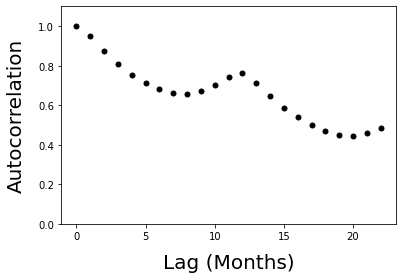

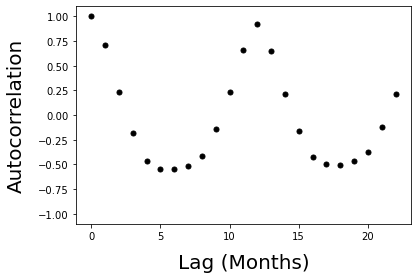

In [4]:
plot_acf(series, alpha=None, use_vlines=False, color='k')
plt.ylim(0, 1.1)
plt.ylabel("Autocorrelation", fontsize=20, labelpad=12)
plt.xlabel("Lag (Months)", fontsize=20, labelpad=12)
plt.title("")
pyplot.show()

plot_acf(result.seasonal, alpha=None, use_vlines=False, color='k')
plt.ylim(-1.1, 1.1)
plt.ylabel("Autocorrelation", fontsize=20, labelpad=12)
plt.xlabel("Lag (Months)", fontsize=20, labelpad=12)
plt.title("")
pyplot.show()

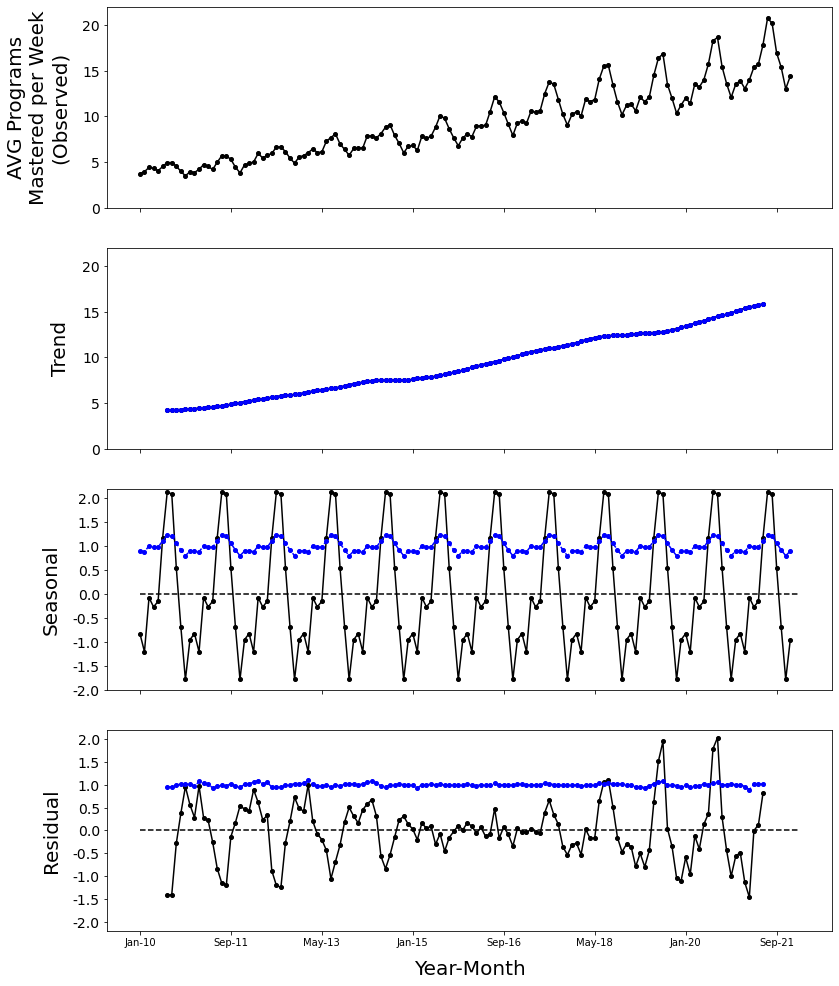

In [5]:
# Decompose it using statsmodels
result = seasonal_decompose(
    series, 
    model='additive', 
    two_sided=True, 
    period=12, 
    extrapolate_trend=False
)

# Plot it
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(13, 17))
result.observed.plot(ax=axes[0], legend=False, color='k', marker='o', markersize=4)
axes[0].set_ylabel("AVG Programs\nMastered per Week\n(Observed)", fontsize=20, labelpad=12)
axes[0].set_yticks(list(range(0, 25, 5)))
axes[0].set_yticklabels(list(range(0, 25, 5)), fontsize=14)
axes[0].set_ylim(0, 22)

result.trend.plot(ax=axes[1], legend=False, color='k', marker='o', markersize=4)
axes[1].set_ylabel("Trend", fontsize=20, labelpad=12)
ticks = list(np.arange(0, 26, 5))
ticks = [round(val, 2) for val in ticks]
axes[1].set_yticks(ticks)
axes[1].set_yticklabels(ticks, fontsize=14)
axes[1].set_ylim(0, 22)

result.seasonal.plot(ax=axes[2], legend=False, color='k', marker='o', markersize=4)
axes[2].plot([0, 145], [0, 0], color='k', linestyle='--')
axes[2].set_ylabel("Seasonal", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.51, 0.5))
ticks = [round(val, 2) for val in ticks]
axes[2].set_yticks(ticks)
axes[2].set_yticklabels(ticks, fontsize=14)
axes[2].set_ylim(-2.0, 2.2)

result.resid.plot(ax=axes[3], legend=False, color='k', marker='o', markersize=4)
axes[3].plot([0, 145], [0, 0], color='k', linestyle='--')
axes[3].set_ylabel("Residual", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.01, 0.5))
ticks = [round(val, 2) for val in ticks]
axes[3].set_yticks(ticks)
axes[3].set_yticklabels(ticks, fontsize=14)
axes[3].set_ylim(-2.20, 2.20)
axes[3].set_xlabel("Month", fontsize=20, labelpad=12)

# Decompose it using statsmodels
result = seasonal_decompose(
    series, 
    model='multiplicative', 
    two_sided=True, 
    period=12, 
    extrapolate_trend=False
)

# Plot it
result.trend.plot(ax=axes[1], legend=False, color='blue', linestyle='--', marker='o', markersize=4)
result.seasonal.plot(ax=axes[2], legend=False, color='blue', linestyle='--', marker='o', markersize=4)
result.resid.plot(ax=axes[3], legend=False, color='blue', linestyle='--', marker='o', markersize=4)
plt.show()

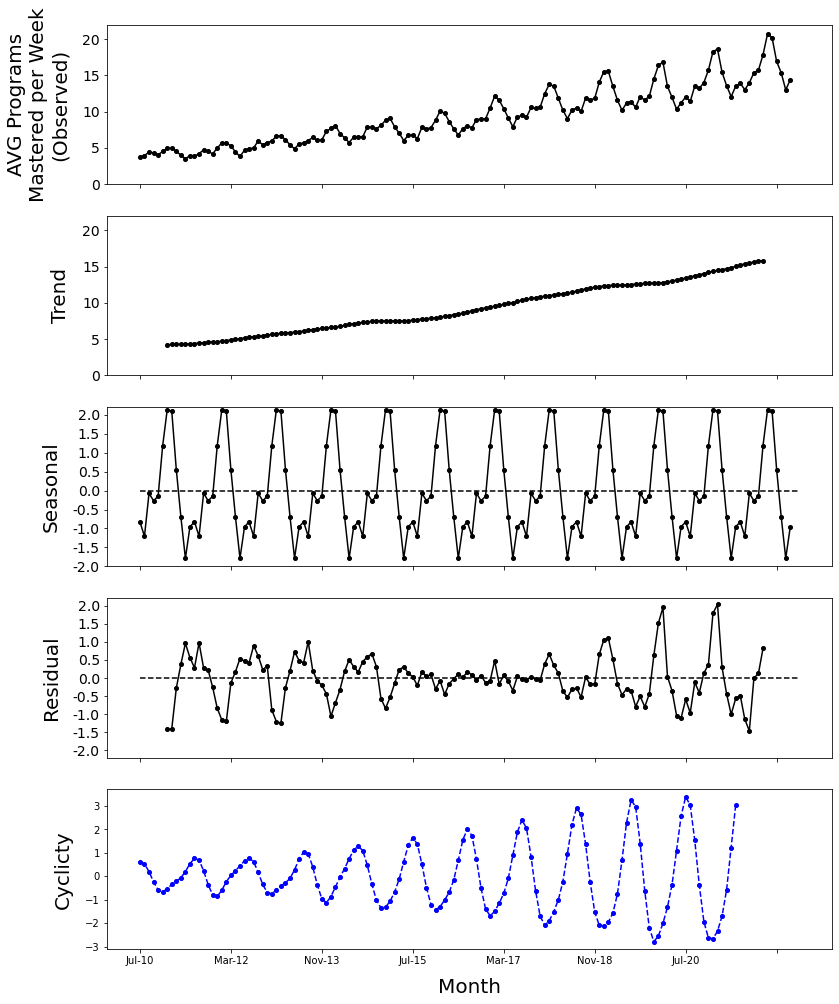

In [6]:
# Decompose it using statsmodels
result = seasonal_decompose(
    series, 
    model='additive', 
    two_sided=True, 
    period=12, 
    extrapolate_trend=False
)

# Plot it
fig, axes = plt.subplots(5, 1, sharex=True, figsize=(13, 17))
result.observed.plot(ax=axes[0], legend=False, color='k', marker='o', markersize=4)
axes[0].set_ylabel("AVG Programs\nMastered per Week\n(Observed)", fontsize=20, labelpad=12)
axes[0].set_yticks(list(range(0, 25, 5)))
axes[0].set_yticklabels(list(range(0, 25, 5)), fontsize=14)
axes[0].set_ylim(0, 22)

result.trend.plot(ax=axes[1], legend=False, color='k', marker='o', markersize=4)
axes[1].set_ylabel("Trend", fontsize=20, labelpad=12)
ticks = list(np.arange(0, 26, 5))
ticks = [round(val, 2) for val in ticks]
axes[1].set_yticks(ticks)
axes[1].set_yticklabels(ticks, fontsize=14)
axes[1].set_ylim(0, 22)

result.seasonal.plot(ax=axes[2], legend=False, color='k', marker='o', markersize=4)
axes[2].plot([0, 145], [0, 0], color='k', linestyle='--')
axes[2].set_ylabel("Seasonal", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.51, 0.5))
ticks = [round(val, 2) for val in ticks]
axes[2].set_yticks(ticks)
axes[2].set_yticklabels(ticks, fontsize=14)
axes[2].set_ylim(-2.0, 2.2)

result.resid.plot(ax=axes[3], legend=False, color='k', marker='o', markersize=4)
axes[3].plot([0, 145], [0, 0], color='k', linestyle='--')
axes[3].set_ylabel("Residual", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.01, 0.5))
ticks = [round(val, 2) for val in ticks]
axes[3].set_yticks(ticks)
axes[3].set_yticklabels(ticks, fontsize=14)
axes[3].set_ylim(-2.20, 2.20)
axes[3].set_xlabel("Month", fontsize=20, labelpad=12)

# Decompose it using statsmodels
result = sm.tsa.filters.bkfilter(
    series, 
    low=6, 
    high=32, 
    K=6
)

# Plot it
result.plot(ax=axes[4], legend=False, color='blue', linestyle='--', marker='o', markersize=4)
axes[4].set_ylabel("Cyclicty", fontsize=20, labelpad=12)
ticks = list(np.arange(-2.0, 2.01, 0.5))
ticks = [round(val, 2) for val in ticks]
# axes[4].set_yticks(ticks)
# axes[4].set_yticklabels(ticks, fontsize=14)
# axes[4].set_ylim(-2.20, 2.20)
axes[4].set_xlabel("Month", fontsize=20, labelpad=12)

plt.show()

3 [0.08932147 2.87412274]


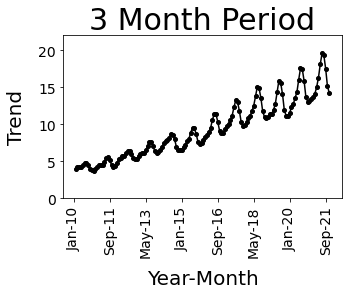




6 [0.08974628 2.8235756 ]


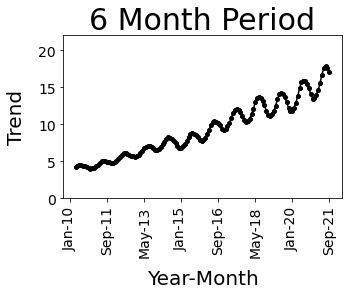




9 [0.08911681 2.8377815 ]


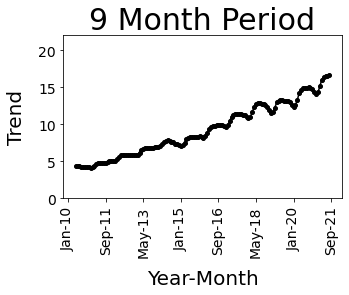




12 [0.08890201 2.82131815]


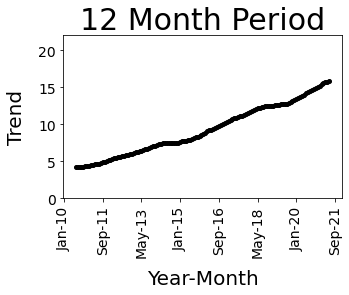




15 [0.0889857  2.81060351]


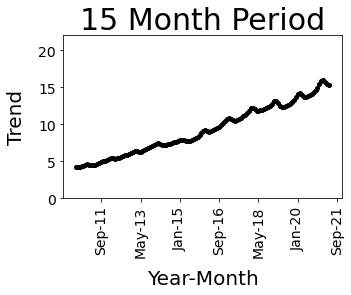




18 [0.08911425 2.78798917]


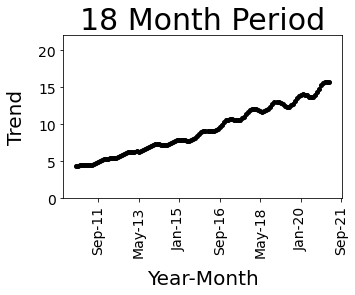

In [7]:
for period in [3, 6, 9, 12, 15, 18]:
    # Decompose it using statsmodels
    result = seasonal_decompose(
        series, 
        model='additive', 
        two_sided=True, 
        period=period, 
        extrapolate_trend=False
    )
    # Print slope
    temp = pd.DataFrame(result.trend).reset_index()
    temp['Month_Count'] = [val+1 for val in list(range(len(temp)))]
    temp = temp.dropna().reset_index(drop=True)
    print(period, np.polyfit(temp['Month_Count'], temp['trend'], 1))

    # Plot it
    fig, axes = plt.subplots(figsize=(5, 3))
    result.trend.plot(legend=False, color='k', marker='o', markersize=4)
    plt.ylabel("Trend", fontsize=20, labelpad=12)
    ticks = list(np.arange(0, 26, 5))
    ticks = [round(val, 2) for val in ticks]
    plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
    plt.ylim(0, 22)
    plt.title(f"{period} Month Period", fontsize=30)
    plt.xticks(rotation=90, fontsize=14)
    plt.xlabel("Year-Month", fontsize=20, labelpad=12)
    plt.show()
    print("\n\n")

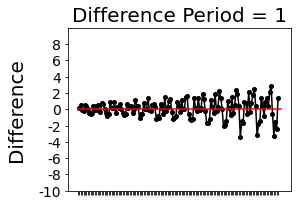

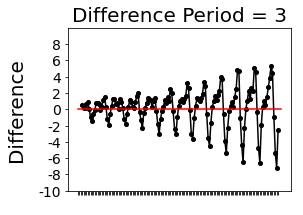

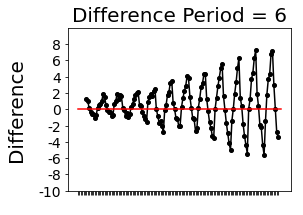

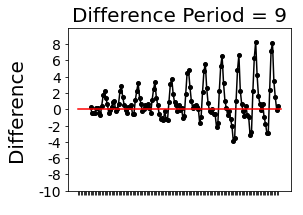

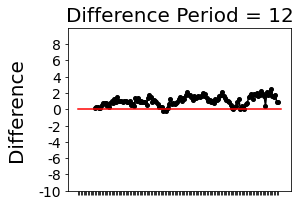

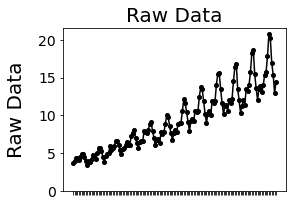

In [8]:
for p in [1, 3, 6, 9, 12]:
    diff = series.diff(periods=p)
    # Plot it
    fig, axes = plt.subplots(figsize=(4, 3))
    pyplot.plot(diff, color='k', marker='o', markersize=4)
    plt.ylabel("Difference", fontsize=20, labelpad=12)
    plt.plot([0, 145], [0, 0], color='red')
    ticks = list(np.arange(-10, 10, 2))
    ticks = [round(val, 2) for val in ticks]
    plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
    plt.xticks(color='w')
    plt.ylim(-10, 10)
    plt.title(f"Difference Period = {p}", fontsize=20)
    plt.show()

# Plot it
fig, axes = plt.subplots(figsize=(4, 3))
pyplot.plot(series, color='k', marker='o', markersize=4)
plt.ylabel("Raw Data", fontsize=20, labelpad=12)
ticks = list(np.arange(0, 22, 5))
ticks = [round(val, 2) for val in ticks]
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(color='w')
plt.title(f"Raw Data", fontsize=20)
plt.show()

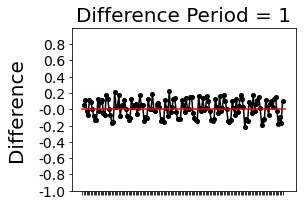

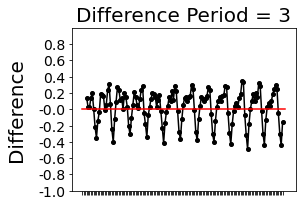

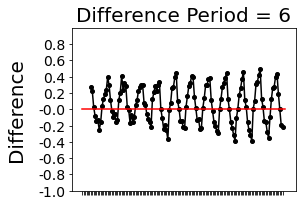

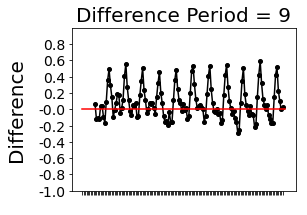

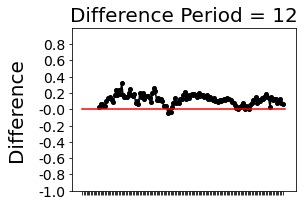

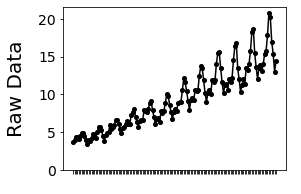

In [9]:
for p in [1, 3, 6, 9, 12]:
    diff = np.log(series).diff(periods=p)
    # Plot it
    fig, axes = plt.subplots(figsize=(4, 3))
    pyplot.plot(diff, color='k', marker='o', markersize=4)
    plt.ylabel("Difference", fontsize=20, labelpad=12)
    plt.plot([0, 145], [0, 0], color='red')
    ticks = list(np.arange(-1, 1, .2))
    ticks = [round(val, 2) for val in ticks]
    plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
    plt.xticks(color='w')
    plt.ylim(-1, 1)
    plt.title(f"Difference Period = {p}", fontsize=20)
    plt.show()

# Plot it
fig, axes = plt.subplots(figsize=(4, 3))
pyplot.plot(series, color='k', marker='o', markersize=4)
plt.ylabel("Raw Data", fontsize=20, labelpad=12)
ticks = list(np.arange(0, 22, 5))
ticks = [round(val, 2) for val in ticks]
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(color='w')
plt.show()

In [10]:
diff_1 = np.log(series).diff(periods=1)
diff_1 = diff_1*10 + 5
diff_1['time'] = [val+1 for val in range(0, len(diff_1))]
diff_1.index = diff_1['time']
diff_1 = diff_1.drop(['time'], axis=1)
diff_1 = diff_1.dropna().reset_index(drop=True)

In [11]:
diff_1.iloc[:12, :]

,Average Targets Mastered per Week
0,5.522312
1,6.129651
2,4.770105
3,4.351514
4,6.103110
5,5.912616
6,5.000000
7,4.153830
8,3.680442
9,3.653885


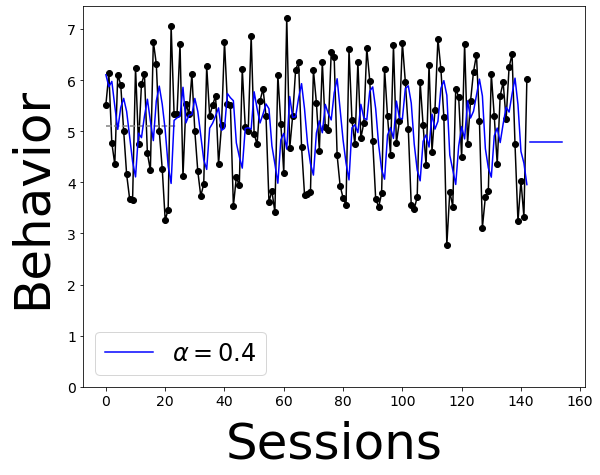

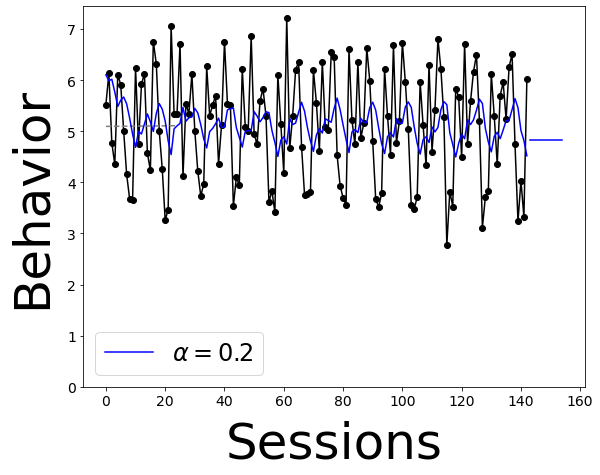

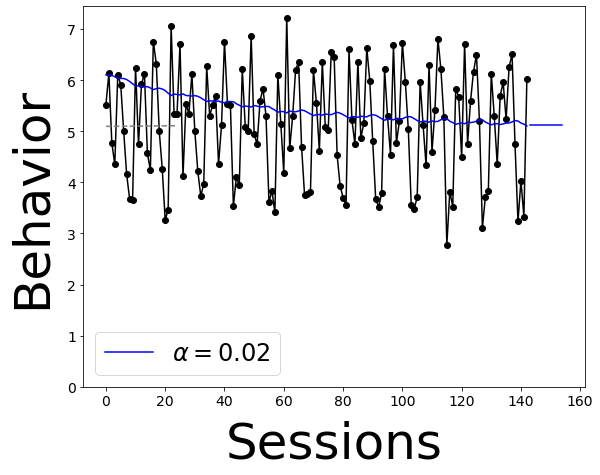

In [12]:
fit1 = SimpleExpSmoothing(diff_1, initialization_method="heuristic").fit(
    smoothing_level=0.4, optimized=False
)
fcast1 = fit1.forecast(12).rename(r"$\alpha=0.4$")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(diff_1, marker="o", color="black")
plt.plot([0, 24], [diff_1.mean(), diff_1.mean()], color="gray", linestyle='--')
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.legend([line1], [fcast1.name], fontsize=24, loc="lower left")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()

fit1 = SimpleExpSmoothing(diff_1, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(12).rename(r"$\alpha=0.2$")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(diff_1, marker="o", color="black")
plt.plot([0, 24], [diff_1.mean(), diff_1.iloc[:24, :].mean()], color="gray", linestyle='--')
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.legend([line1], [fcast1.name], fontsize=24, loc="lower left")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()

fit1 = SimpleExpSmoothing(diff_1, initialization_method="heuristic").fit(
    smoothing_level=0.02, optimized=False
)
fcast1 = fit1.forecast(12).rename(r"$\alpha=0.02$")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(diff_1, marker="o", color="black")
plt.plot([0, 24], [diff_1.mean(), diff_1.iloc[:24, :].mean()], color="gray", linestyle='--')
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.legend([line1], [fcast1.name], fontsize=24, loc="lower left")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()

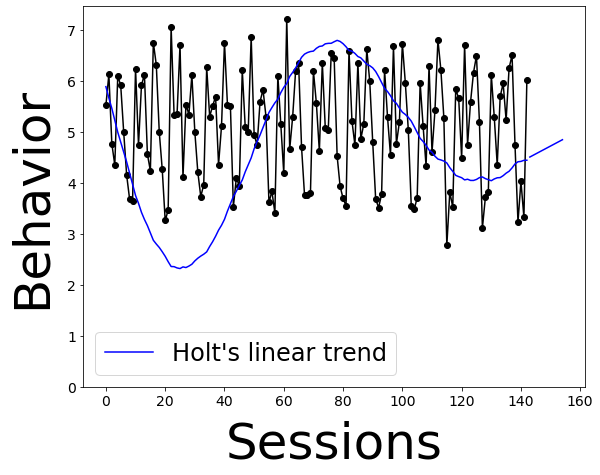

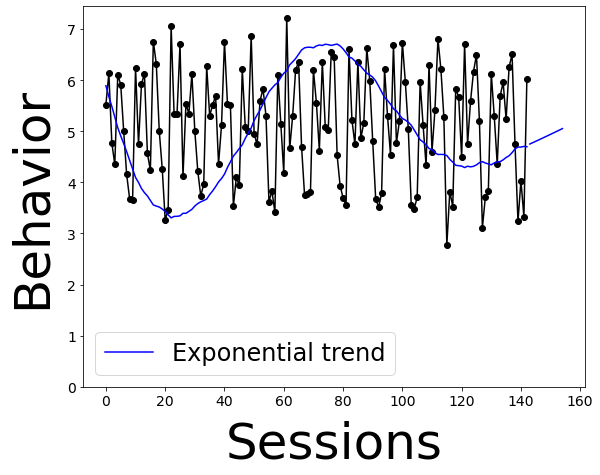

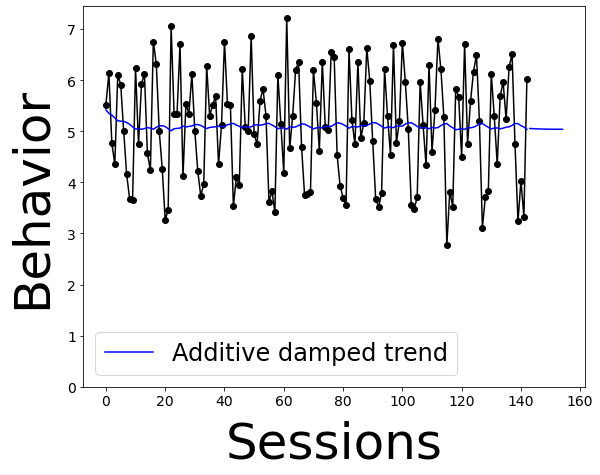

In [13]:
fit1 = Holt(diff_1, initialization_method="estimated").fit(
    smoothing_level=0.02, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(diff_1, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.legend([line1], [fcast1.name], fontsize=24, loc="best")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()


fit2 = Holt(diff_1, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.02, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(12).rename("Exponential trend")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(diff_1, marker="o", color="black")
plt.plot(fit2.fittedvalues, color="blue")
(line1,) = plt.plot(fcast2, color="blue")
plt.legend([line1], [fcast2.name], fontsize=24, loc="best")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()


fit3 = Holt(diff_1, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.02, smoothing_trend=0.2
)
fcast3 = fit3.forecast(12).rename("Additive damped trend")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(diff_1, marker="o", color="black")
plt.plot(fit3.fittedvalues, color="blue")
(line1,) = plt.plot(fcast3, color="blue")
plt.legend([line1], [fcast3.name], fontsize=24, loc="best")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()

In [14]:
series_t = series.copy()
series_t['time'] = [val+1 for val in range(0, len(series_t))]
series_t.index = series_t['time']
series_t = series_t.drop(['time'], axis=1)
series_t = series_t.dropna().reset_index(drop=True)

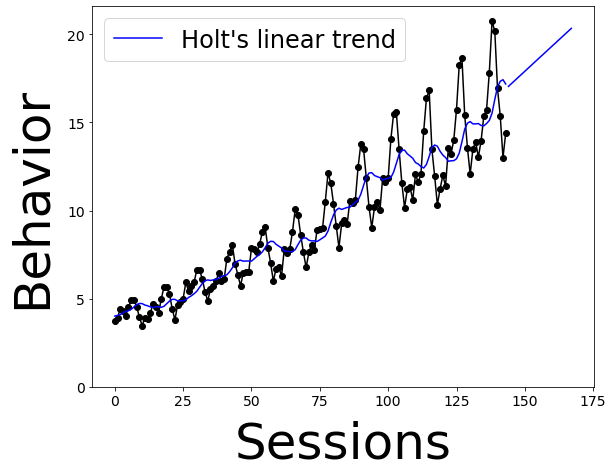

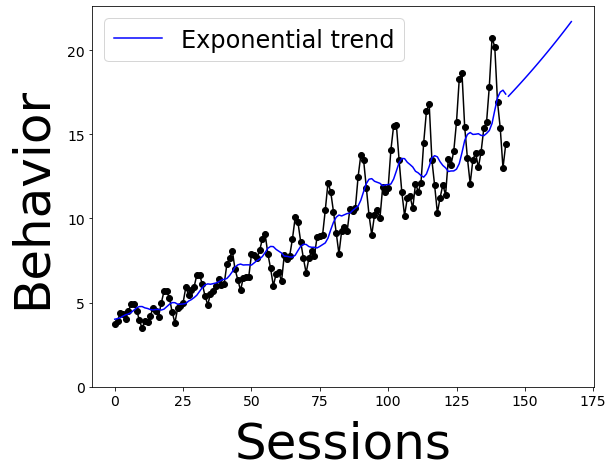

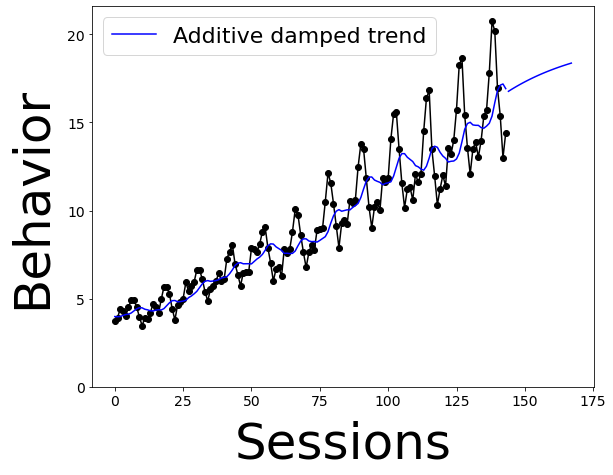

In [15]:
fit1 = Holt(series_t, initialization_method="estimated").fit(
    smoothing_level=0.1, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(24).rename("Holt's linear trend")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(series_t, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.legend([line1], [fcast1.name], fontsize=24, loc="best")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 25, 5))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()


fit2 = Holt(series_t, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.1, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(24).rename("Exponential trend")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(series_t, marker="o", color="black")
plt.plot(fit2.fittedvalues, color="blue")
(line1,) = plt.plot(fcast2, color="blue")
plt.legend([line1], [fcast2.name], fontsize=24, loc="best")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 25, 5))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()


fit3 = Holt(series_t, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.1, smoothing_trend=0.2
)
fcast3 = fit3.forecast(24).rename("Additive damped trend")

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(series_t, marker="o", color="black")
plt.plot(fit3.fittedvalues, color="blue")
(line1,) = plt.plot(fcast3, color="blue")
plt.legend([line1], [fcast3.name], fontsize=22, loc="upper left")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 25, 5))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/c5/vpx80swj4yb9ytlnrk8w2qnr0000gn/T/ipykernel_92165/1972355361.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = diff_1.append(append_df).reset_index(drop=True)


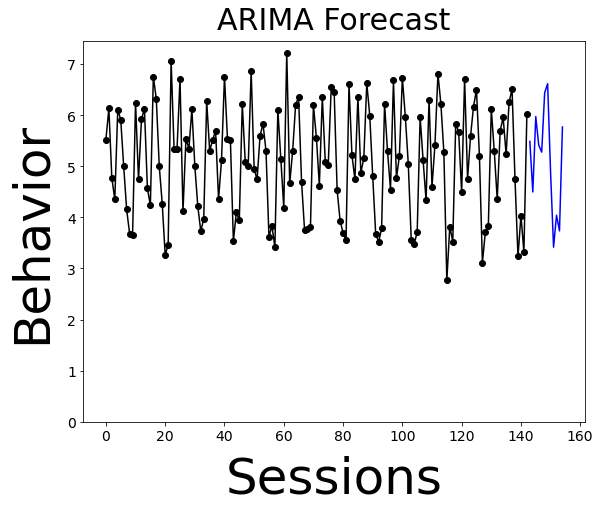

In [16]:
# ARIMA Model
model = ARIMA(diff_1['Average Targets Mastered per Week'], order=(24, 1, 24))
res = model.fit()

# Add forecast to df to show prediction
append_df = pd.DataFrame([np.nan]*12)
append_df.columns = ['Average Targets Mastered per Week']
plot_df = diff_1.append(append_df).reset_index(drop=True)

# Make forecast
forecast = res.forecast(12)
plot_df['ARIMA Forecast'] = [np.nan]*len(diff_1) + list(forecast)

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(plot_df['Average Targets Mastered per Week'], marker="o", color="black")
plt.plot(plot_df['ARIMA Forecast'], color="blue")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 8, 1))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.title("ARIMA Forecast", fontsize=30, pad=12)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33704D-01    |proj g|=  8.26089D-02

At iterate    5    f=  4.30111D-01    |proj g|=  1.12337D-02

At iterate   10    f=  4.25796D-01    |proj g|=  7.05716D-02

At iterate   15    f=  4.20967D-01    |proj g|=  7.54663D-03

At iterate   20    f=  4.20572D-01    |proj g|=  1.30134D-03

At iterate   25    f=  4.20526D-01    |proj g|=  1.86046D-03

At iterate   30    f=  4.20431D-01    |proj g|=  3.81772D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/var/folders/c5/vpx80swj4yb9ytlnrk8w2qnr0000gn/T/ipykernel_92165/2492528224.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = series.append(append_df).reset_index(drop=True)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


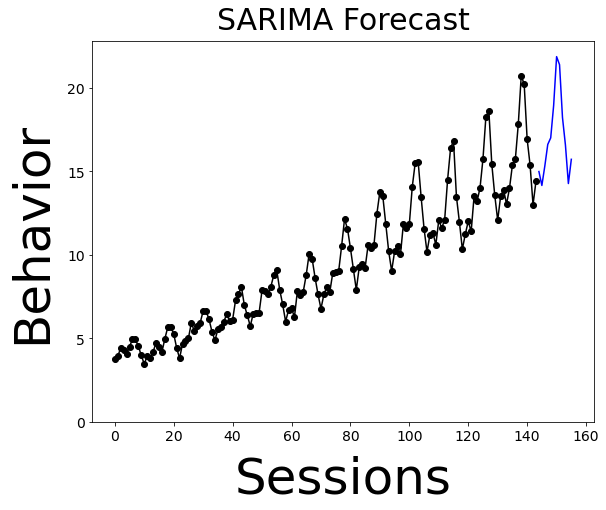

In [17]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=series['Average Targets Mastered per Week'], 
                order=(1, 1, 1), 
               seasonal_order=(1, 1, 1, 12))
res = model.fit()

# Add forecast to df to show prediction
append_df = pd.DataFrame([np.nan]*12)
append_df.columns = ['Average Targets Mastered per Week']
plot_df = series.append(append_df).reset_index(drop=True)

# Make forecast
forecast = res.forecast(12)
plot_df['ARIMA Forecast'] = [np.nan]*len(series) + list(forecast)

# Plot it
plt.figure(figsize=(9, 7))
plt.plot(plot_df['Average Targets Mastered per Week'], marker="o", color="black")
plt.plot(plot_df['ARIMA Forecast'], color="blue")
plt.ylabel("Behavior", fontsize=50, labelpad=12)
ticks = list(np.arange(0, 25, 5))
plt.yticks(ticks=ticks, labels=ticks, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("Sessions", fontsize=50, labelpad=12)
plt.title("SARIMA Forecast", fontsize=30, pad=12)
plt.show()